In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import descartes
from itertools import chain
# from mpl_toolkits.basemap import Basemap
%matplotlib inline
#import geopandas as gpd
#from shapely.geometry import Point, Polygon

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
!pip install chart_studio

     |████████████████████████████████| 71kB 2.3MB/s 


In [0]:
import chart_studio.plotly as py 
from chart_studio.plotly import plot, iplot

import plotly.graph_objs as go #importing graphical objects
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [7]:
from google.colab import files
uploaded = files.upload()

Saving merged.csv to merged.csv


In [0]:
df = pd.read_csv('merged.csv')

In [0]:
# # Remove NA columns
# combined = df.dropna(axis=1)

# # Clean the column names to remove spaces and capitals
# combined.columns = [c.replace(" ", "_").lower() for c in combined.columns]

# # Convert date column to year only
# combined.date = combined.date.str.split('-').str[0]
# combined = combined.rename(columns={'date': 'year'})
# combined = combined.astype({'year': 'int64'})

# # Pivot on defining_parameter since it is categorical. This column denotes the worst factor for air quality that day
# d = pd.get_dummies(combined['defining_parameter'], prefix='defining')
# df = pd.concat([combined, d], axis=1).drop(['defining_parameter'], axis=1)
# df = df.dropna().groupby(by=['year', 'state_name', 'county_name'], as_index=False).mean()

# # Fix the schema for the columns which will become the index (lat, lon, year)
# df = df.dropna()
# df.year = df.year.astype(int)
# df.lat = df.lat.astype(int)
# df.lon = df.lon.astype(int)

# # Regroup by year, lat, lon and aggregate by sum
# df = df.dropna().groupby(by=['year', 'lat', 'lon'], as_index=False).sum()

In [0]:
df.head()

,year,lat,lon,aqi,defining_CO,defining_NO2,defining_Ozone,defining_PM10,defining_PM2.5,defining_SO2,...,cancer_Oral Cavity and Pharynx,cancer_Ovary,cancer_Pancreas,cancer_Prostate,cancer_Stomach,cancer_Thyroid,"cancer_Urinary Bladder, invasive and in situ",life_expectancy_avg,life_expectancy_max,life_expectancy_min
0,2010,21,-158,39.715068,0.0,0.00274,0.230137,0.024658,0.742466,0.000000,...,121.0,64.0,164.0,556.0,115.0,157.0,158.0,81.294118,88.416667,78.852941
1,2010,26,-98,44.077348,0.0,0.00000,0.406077,0.002762,0.591160,0.000000,...,31.0,40.0,47.0,220.0,44.0,73.0,63.0,159.097706,168.700229,155.627752
2,2010,27,-82,42.367123,0.0,0.00000,0.695890,0.010959,0.293151,0.000000,...,1023.0,552.0,1137.0,5460.0,598.0,970.0,1947.0,395.213735,412.286007,379.924932
3,2010,28,-82,183.767123,0.0,0.00000,3.038356,0.002740,0.821918,0.136986,...,134.0,60.0,115.0,554.0,44.0,58.0,182.0,310.118286,323.254386,288.395522
4,2010,28,-81,208.062127,0.0,0.00000,3.714128,0.000000,1.285872,0.000000,...,405.0,181.0,338.0,1922.0,195.0,301.0,649.0,236.124946,246.422004,226.526906


In [0]:
df.describe()

,year,lat,lon,aqi,defining_CO,defining_NO2,defining_Ozone,defining_PM10,defining_PM2.5,defining_SO2,...,cancer_Oral Cavity and Pharynx,cancer_Ovary,cancer_Pancreas,cancer_Prostate,cancer_Stomach,cancer_Thyroid,"cancer_Urinary Bladder, invasive and in situ",life_expectancy_avg,life_expectancy_max,life_expectancy_min
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,...,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,2013.018771,37.162116,-91.650171,158.459181,0.003246,0.112246,1.999356,0.102329,1.255001,0.084136,...,292.226962,153.771331,323.349829,1393.087031,175.703072,364.288396,498.636519,452.570763,471.438007,424.418481
std,2.004607,5.053491,16.858957,103.287669,0.017650,0.259795,1.425142,0.321642,1.007521,0.213660,...,360.576392,218.411622,450.610684,1969.084010,287.857361,579.596028,677.977336,269.797670,281.160913,250.923282
min,2010.000000,21.000000,-158.000000,29.901961,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17.000000,0.000000,28.000000,156.000000,0.000000,45.000000,39.000000,76.831343,78.853731,72.405970
25%,2011.000000,34.000000,-98.000000,74.316453,0.000000,0.000000,0.656164,0.000000,0.509720,0.000000,...,100.000000,48.000000,106.000000,457.250000,54.000000,108.250000,164.000000,246.803237,270.963263,240.600036
50%,2013.000000,38.000000,-85.000000,150.300829,0.000000,0.020518,1.846735,0.002740,1.001814,0.000000,...,155.000000,78.000000,165.000000,750.500000,85.000000,172.000000,258.500000,400.052490,424.720701,387.411350
75%,2015.000000,41.000000,-80.000000,211.635115,0.000000,0.098833,2.941942,0.021946,1.771103,0.052055,...,311.000000,152.750000,320.750000,1386.750000,163.000000,341.750000,505.000000,604.979179,617.894626,551.802143
max,2016.000000,48.000000,-71.000000,598.176088,0.274238,1.892114,6.790533,2.000000,6.099890,1.268493,...,2606.000000,1656.000000,3462.000000,16530.000000,2251.000000,4798.000000,5258.000000,1221.887017,1306.379503,1172.653571


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Columns: 125 entries, year to life_expectancy_min
dtypes: float64(122), int64(3)
memory usage: 572.4 KB


In [51]:
lat = df['lat'].values
lon = df['lon'].values
a = df['age-adjusted_rate'].values
data = go.Scattergeo(
        lon = lon,
        lat = lat,
        mode = 'markers',
        marker = dict(symbol = 'circle',size=5,colorscale = 'Reds'
                      ),
        marker_color = a,
        )
layout = dict(title = 'Age-Adjusted Rate ',
              geo_scope = 'usa'
             )
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

Age adjusting rates is a way to make fairer comparisons between groups with different age distributions. For example, a county having a higher percentage of elderly people may have a higher rate of death or hospitalization than a county with a younger population, merely because the elderly are more likely to die or be hospitalized. (The same distortion can happen when comparing races, genders, or time periods.) Age adjustment can make the different groups more comparable.

A "standard" population distribution is used to adjust death and hospitalization rates. The age-adjusted rates are rates that would have existed if the population under study had the same age distribution as the "standard" population. Therefore, they are summary measures adjusted for differences in age distributions.

The National Center for Health Statistics recommends that the U.S. 2000 standard population be used when calculating age-adjusted rates. Users of Missouri Information for Community Assessment (MICA) have the option of selecting age-adjusted rates based on the U.S. 1940, 1970 or 2000 standard populations when generating tables where age-adjustment is utilized. The National Center for Health Statistics recommends that the U.S. 2000 standard population be used when calculating age-adjusted rates. However, if you compare rates from different sources, it is very important that you use the same standard population on both sides of your comparison. It is not legitimate to compare adjusted rates which use different standard populations.

Age-adjusted rates in the Community Data Profiles use the U.S. 2000 standard population.


https://health.mo.gov/data/mica/CDP_MICA/AARate.html

In [0]:
df_cancer = df[[c for c in df.columns if 'cancer' in c]]
df_cancer

,cancer_Brain and Other Nervous System,cancer_Breast,cancer_Cervix Uteri,cancer_Colon and Rectum,cancer_Corpus Uteri,cancer_Esophagus,cancer_Gallbladder,cancer_Kidney and Renal Pelvis,cancer_Larynx,cancer_Leukemias,...,cancer_Melanoma of the Skin,cancer_Myeloma,cancer_Non-Hodgkin Lymphoma,cancer_Oral Cavity and Pharynx,cancer_Ovary,cancer_Pancreas,cancer_Prostate,cancer_Stomach,cancer_Thyroid,"cancer_Urinary Bladder, invasive and in situ"
0,36.0,776.0,27.0,530.0,162.0,39.0,0.0,138.0,31.0,129.0,...,195.0,48.0,214.0,121.0,64.0,164.0,556.0,115.0,157.0,158.0
1,49.0,289.0,31.0,205.0,65.0,22.0,0.0,110.0,0.0,89.0,...,34.0,29.0,92.0,31.0,40.0,47.0,220.0,44.0,73.0,63.0
2,544.0,5438.0,346.0,3602.0,1081.0,346.0,90.0,1164.0,348.0,1293.0,...,1508.0,605.0,1858.0,1023.0,552.0,1137.0,5460.0,598.0,970.0,1947.0
3,47.0,516.0,28.0,333.0,94.0,48.0,0.0,128.0,37.0,146.0,...,236.0,72.0,181.0,134.0,60.0,115.0,554.0,44.0,58.0,182.0
4,179.0,1856.0,118.0,1187.0,399.0,137.0,26.0,415.0,123.0,497.0,...,573.0,202.0,601.0,405.0,181.0,338.0,1922.0,195.0,301.0,649.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,82.0,830.0,26.0,420.0,188.0,65.0,19.0,230.0,37.0,165.0,...,258.0,98.0,257.0,181.0,62.0,189.0,636.0,82.0,176.0,313.0
582,52.0,535.0,28.0,248.0,107.0,42.0,0.0,134.0,18.0,112.0,...,223.0,35.0,156.0,102.0,34.0,105.0,396.0,38.0,119.0,167.0
583,178.0,1826.0,64.0,892.0,430.0,117.0,26.0,433.0,53.0,344.0,...,776.0,128.0,533.0,348.0,130.0,339.0,1171.0,141.0,391.0,494.0
584,274.0,3092.0,127.0,1466.0,615.0,186.0,41.0,648.0,93.0,601.0,...,1091.0,289.0,789.0,540.0,219.0,512.0,2089.0,253.0,582.0,857.0


In [0]:
df_cancer.describe()

,cancer_Brain and Other Nervous System,cancer_Breast,cancer_Cervix Uteri,cancer_Colon and Rectum,cancer_Corpus Uteri,cancer_Esophagus,cancer_Gallbladder,cancer_Kidney and Renal Pelvis,cancer_Larynx,cancer_Leukemias,...,cancer_Melanoma of the Skin,cancer_Myeloma,cancer_Non-Hodgkin Lymphoma,cancer_Oral Cavity and Pharynx,cancer_Ovary,cancer_Pancreas,cancer_Prostate,cancer_Stomach,cancer_Thyroid,"cancer_Urinary Bladder, invasive and in situ"
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.00000,586.000000,586.000000,...,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,157.464164,1722.237201,91.013652,966.392491,359.011945,111.008532,23.216724,404.68430,81.923208,344.044369,...,513.448805,174.383959,485.694539,292.226962,153.771331,323.349829,1393.087031,175.703072,364.288396,498.636519
std,202.028997,2324.969644,131.741718,1313.754057,524.972378,138.554090,49.662441,509.35428,104.314314,485.478650,...,614.054819,256.188074,688.226320,360.576392,218.411622,450.610684,1969.084010,287.857361,579.596028,677.977336
min,22.000000,170.000000,0.000000,84.000000,39.000000,0.000000,0.000000,38.00000,0.000000,51.000000,...,26.000000,16.000000,61.000000,17.000000,0.000000,28.000000,156.000000,0.000000,45.000000,39.000000
25%,51.000000,526.500000,28.000000,325.000000,112.250000,38.000000,0.000000,138.00000,28.000000,111.000000,...,169.000000,54.000000,156.000000,100.000000,48.000000,106.000000,457.250000,54.000000,108.250000,164.000000
50%,82.500000,896.500000,45.000000,503.000000,183.500000,58.000000,0.000000,230.50000,46.500000,175.500000,...,280.500000,92.000000,243.000000,155.000000,78.000000,165.000000,750.500000,85.000000,172.000000,258.500000
75%,166.750000,1788.750000,90.000000,941.000000,369.250000,117.000000,27.000000,411.75000,85.000000,335.750000,...,620.250000,161.750000,472.750000,311.000000,152.750000,320.750000,1386.750000,163.000000,341.750000,505.000000
max,1467.000000,17382.000000,970.000000,9605.000000,4108.000000,1029.000000,383.000000,3856.00000,770.000000,3729.000000,...,4336.000000,2054.000000,5186.000000,2606.000000,1656.000000,3462.000000,16530.000000,2251.000000,4798.000000,5258.000000


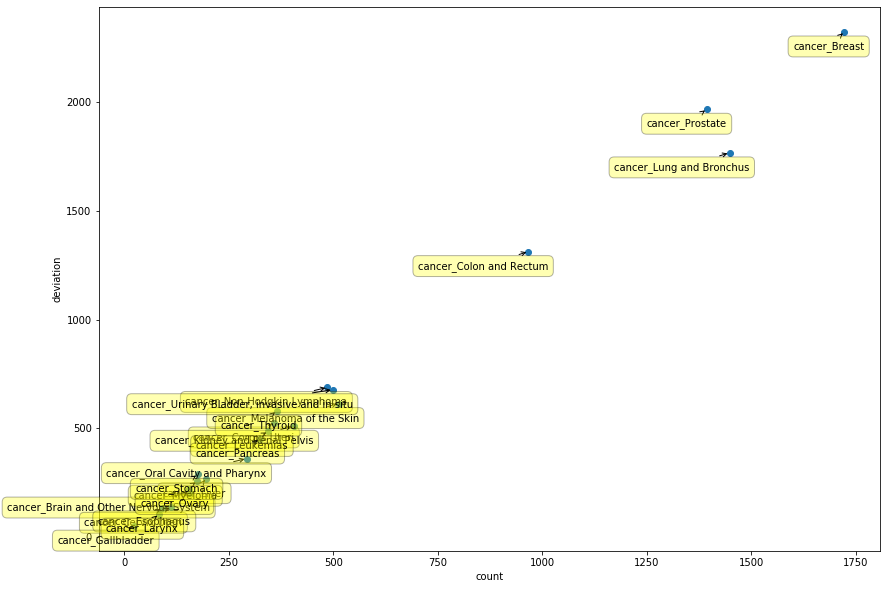

In [0]:
plt.figure(figsize=(14,10))
plt.scatter(df_cancer.mean(), df_cancer.std())
plt.xlabel('count')
plt.ylabel('deviation')
for label, x, y in zip(df_cancer.columns, df_cancer.mean(), df_cancer.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.3),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [0]:
df_not_cancer = df[[c for c in df.columns if 'cancer' not in c]]
df_not_cancer

,year,lat,lon,aqi,defining_CO,defining_NO2,defining_Ozone,defining_PM10,defining_PM2.5,defining_SO2,...,sector_Textile Product,sector_Textiles,sector_Tobacco,sector_Transportation Equipment,sector_Wood Products,population,age-adjusted_rate,life_expectancy_avg,life_expectancy_max,life_expectancy_min
0,2010,21,-158,39.715068,0.000000,0.00274,0.230137,0.024658,0.742466,0.000000,...,0.0,0.0,0.0,0.000000,0.037037,18165954.0,475.2,81.294118,88.416667,78.852941
1,2010,26,-98,44.077348,0.000000,0.00000,0.406077,0.002762,0.591160,0.000000,...,0.0,0.0,0.0,0.555556,0.000000,14043287.0,356.8,159.097706,168.700229,155.627752
2,2010,27,-82,42.367123,0.000000,0.00000,0.695890,0.010959,0.293151,0.000000,...,0.0,0.0,0.0,0.075235,0.003135,137045170.0,1432.0,395.213735,412.286007,379.924932
3,2010,28,-82,183.767123,0.000000,0.00000,3.038356,0.002740,0.821918,0.136986,...,0.0,0.0,0.0,0.040000,0.056000,11471146.0,573.4,310.118286,323.254386,288.395522
4,2010,28,-81,208.062127,0.000000,0.00000,3.714128,0.000000,1.285872,0.000000,...,0.0,0.0,0.0,0.054795,0.027397,53178421.0,1018.3,236.124946,246.422004,226.526906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,2016,43,-74,104.521436,0.000000,0.00000,1.748634,0.000000,1.251366,0.000000,...,0.0,0.0,0.0,0.000000,0.062500,17674269.0,550.7,559.834455,593.776980,538.773022
582,2016,44,-116,34.267218,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.250000,13126432.0,488.7,159.066667,176.233333,158.300000
583,2016,45,-123,30.764543,0.000000,0.00000,0.407202,0.000000,0.592798,0.000000,...,0.0,0.0,0.0,0.086957,0.152174,48488514.0,446.1,238.184173,250.543362,230.657820
584,2016,47,-122,103.114754,0.000000,0.31694,0.989071,0.000000,1.693989,0.000000,...,0.0,0.0,0.0,0.178404,0.049296,76052878.0,487.7,238.026852,248.482308,228.187973


In [0]:
print("Number of Rows:", len(df))
print("Number of Cols:", len(df.columns), '\n')

print("Highest Variance Cols:")
print(df.var().sort_values(ascending=False)[:10], '\n')

print("Lowest Variance Cols:")
print(df.var().sort_values()[:10], '\n')

print("Top 20 Correlations to Age-Adjusted Rate:")
print(df[[c for c in df.columns if 'cancer' not in c]]
      .corr()['age-adjusted_rate'].sort_values(ascending=False)[:22])

# print("Top 20 Correlations to Age-Adjusted Rate:")
# print(df[[c for c in df.columns if 'cancer' not in c]]
#       .corr()['age-adjusted_rate'].sort_values(ascending=False)[2:22])
#The below 2 values have been removed as they dont contribute in the analysis
#age-adjusted_rate                     1.000000
#population                            0.495891

Number of Rows: 586
Number of Cols: 125 

Highest Variance Cols:
population                 3.779196e+15
production_waste           2.542578e+11
total_releases             1.909209e+10
on-site_release_total      1.894071e+10
other_surface_i            5.614605e+09
total_transfer             1.802190e+09
off-site_recycled_total    1.550502e+09
m24                        1.442020e+09
water                      2.049389e+08
off-site_release_total     1.271601e+08
dtype: float64 

Lowest Variance Cols:
releases              0.000000e+00
landfills             0.000000e+00
underground           0.000000e+00
m63                   0.000000e+00
m71                   0.000000e+00
surface_impndmnt      0.000000e+00
sector_Publishing     3.180443e-07
sector_Apparel        6.450643e-07
sector_Coal Mining    2.369974e-05
sector_Tobacco        5.922906e-05
dtype: float64 

Top 20 Correlations to Age-Adjusted Rate:
age-adjusted_rate                     1.000000
population                            0.

In [0]:
# print(df[['aqi','defining_CO','defining_NO2','defining_Ozone','defining_PM10','defining_PM2.5','defining_SO2','sector_Petroleum Bulk Terminals']].corr()['age-adjusted_rate'].sort_values(ascending=False))

# print(df[[c for c in df.columns]]
#       .corr()['cancer_Lung and Bronchus'].sort_values(ascending=False)[22:50])

corr_lb = df[['aqi','defining_CO','defining_NO2','defining_Ozone','defining_PM10','defining_PM2.5','defining_SO2','sector_Petroleum Bulk Terminals', 'cancer_Lung and Bronchus', 'life_expectancy_avg']].corr()['cancer_Lung and Bronchus'].sort_values(ascending=False)
corr_lb

cancer_Lung and Bronchus           1.000000
sector_Petroleum Bulk Terminals    0.514902
aqi                                0.500966
defining_NO2                       0.496808
defining_PM2.5                     0.472598
defining_Ozone                     0.402843
life_expectancy_avg                0.338325
defining_CO                        0.094520
defining_SO2                      -0.012122
defining_PM10                     -0.091401
Name: cancer_Lung and Bronchus, dtype: float64

In [0]:
corr_liv = df[['aqi','defining_CO','defining_NO2','defining_Ozone','defining_PM10','defining_PM2.5','defining_SO2','cancer_Liver', 'life_expectancy_avg']].corr()['cancer_Liver'].sort_values(ascending=False)
corr_liv

cancer_Liver           1.000000
defining_NO2           0.496738
aqi                    0.436934
defining_PM2.5         0.407510
defining_Ozone         0.319645
life_expectancy_avg    0.231682
defining_CO            0.084534
defining_SO2          -0.068766
defining_PM10         -0.097965
Name: cancer_Liver, dtype: float64

In [0]:
corr_col = df[['aqi','defining_CO','defining_NO2','defining_Ozone','defining_PM10','defining_PM2.5','defining_SO2','cancer_Liver', 'cancer_Colon and Rectum']].corr()['cancer_Colon and Rectum'].sort_values(ascending=False)
corr_col

cancer_Colon and Rectum    1.000000
cancer_Liver               0.977712
defining_NO2               0.508300
aqi                        0.469021
defining_PM2.5             0.444062
defining_Ozone             0.352058
defining_CO                0.084851
defining_SO2              -0.037932
defining_PM10             -0.096191
Name: cancer_Colon and Rectum, dtype: float64

As per above analysis we can see that there is no significant correlation between age adjusted rate and other parameters. 


Historically we have seen that the efforts in finding a relation between ***toxic dumping*** and ***cancer rates*** has been conclusive as backed by research in the area 

https://www.aacr.org/patients-caregivers/progress-against-cancer/air-pollution-associated-cancer/

In [0]:
lat = df['lat'].values
lon = df['lon'].values
a = df['cancer_Lung and Bronchus'].values
data = go.Scattergeo(
        lon = lon,
        lat = lat,
        mode = 'markers',
        marker = dict(symbol = 'circle',size=5,colorscale = 'Reds'
                      ),
        marker_color = a,
        )
layout = dict(title = 'Cancer - Lung and Bronchus',
              geo_scope = 'usa'
             )
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [0]:
lat = df['lat'].values
lon = df['lon'].values
a = df['cancer_Liver'].values
data = go.Scattergeo(
        lon = lon,
        lat = lat,
        mode = 'markers',
        marker = dict(symbol = 'circle',size=5,colorscale = 'Reds'
                      ),
        marker_color = a,
        )
layout = dict(title = 'Cancer - Liver',
              geo_scope = 'usa'
             )
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [0]:
# print("Top 20 Correlations to Age-Adjusted Rate:")
# print(df[[c for c in df.columns if 'cancer' in c]]
#       .corr()['aqi'].sort_values(ascending=False))

print(df[[c for c in df.columns][:60]]
      .corr()['aqi'].sort_values(ascending=False))

#'aqi', 'defining_Ozone', 'defining_NO2', 'sector_Petroleum Bulk Terminals','defining_PM2.5','life_expectancy_avg'

aqi                        1.000000
defining_Ozone             0.874532
defining_PM2.5             0.780970
defining_NO2               0.495271
lon                        0.383945
defining_SO2               0.283063
lat                        0.208814
defining_CO                0.201641
m26                        0.187729
m54                        0.185498
m73                        0.173903
m93                        0.130219
m56                        0.115824
land_treatment             0.109295
off-site_recycled_total    0.103736
defining_PM10              0.091128
m61_non-metal              0.078509
m90                        0.078173
rcra_surface_im            0.077381
water                      0.074864
m28                        0.073396
underground_cl_i           0.068730
m67                        0.060683
m61_metal                  0.059740
trns_trt                   0.059502
total_transfers            0.054937
m24                        0.053768
m99                        0

In [0]:
list(df.columns)

['year',
 'lat',
 'lon',
 'aqi',
 'defining_CO',
 'defining_NO2',
 'defining_Ozone',
 'defining_PM10',
 'defining_PM2.5',
 'defining_SO2',
 'fugitive_air',
 'stack_air',
 'water',
 'underground',
 'underground_cl_i',
 'underground_c_ii-v',
 'landfills',
 'rcra_c_landfill',
 'other_landfills',
 'land_treatment',
 'surface_impndmnt',
 'rcra_surface_im',
 'other_surface_i',
 'on-site_release_total',
 'trns_rlse',
 'trns_trt',
 'total_transfers',
 'm10',
 'm41',
 'm62',
 'm40_metal',
 'm61_metal',
 'm71',
 'm81',
 'm82',
 'm72',
 'm63',
 'm66',
 'm67',
 'm64',
 'm65',
 'm73',
 'm79',
 'm90',
 'm94',
 'm99',
 'off-site_release_total',
 'm20',
 'm24',
 'm26',
 'm28',
 'm93',
 'off-site_recycled_total',
 'm56',
 'm92',
 'm40_non-metal',
 'm50',
 'm54',
 'm61_non-metal',
 'm69',
 'm95',
 'off-site_treated_total',
 'total_transfer',
 'total_releases',
 'releases',
 'on-site_contained',
 'off-site_contain',
 'production_waste',
 'sector_Apparel',
 'sector_Beverages',
 'sector_Chemical Wholesaler

In [0]:
df_aqi = df[['lat', 'lon', 'aqi']].groupby(by=df['year']).mean()
df_aqi

,lat,lon,aqi
year,,,
2010,37.144578,-91.554217,173.725230
2011,37.144578,-91.554217,171.813731
2012,37.144578,-91.554217,168.613638
2013,37.144578,-91.554217,152.069698
2014,37.130952,-91.583333,151.316457
2015,37.211765,-91.870588,148.123526
2016,37.211765,-91.870588,144.229970


https://www.cancer.org/latest-news/world-health-organization-outdoor-air-pollution-causes-cancer.html

In [0]:
df_o3 = df[['lat', 'lon', 'defining_Ozone']].groupby(by=df['year']).mean()
df_o3

,lat,lon,defining_Ozone
year,,,
2010,37.144578,-91.554217,2.025130
2011,37.144578,-91.554217,1.994130
2012,37.144578,-91.554217,2.052958
2013,37.144578,-91.554217,1.963350
2014,37.130952,-91.583333,1.965181
2015,37.211765,-91.870588,1.950880
2016,37.211765,-91.870588,2.044360


In [0]:
df_pm2o5 = df[['lat', 'lon', 'defining_PM2.5']].groupby(by=df['year']).mean()
df_pm2o5 

,lat,lon,defining_PM2.5
year,,,
2010,37.144578,-91.554217,1.283445
2011,37.144578,-91.554217,1.329134
2012,37.144578,-91.554217,1.227693
2013,37.144578,-91.554217,1.302374
2014,37.130952,-91.583333,1.264483
2015,37.211765,-91.870588,1.256750
2016,37.211765,-91.870588,1.124126


A decline in fine particulate matter (PM2.5) air pollution during the period between 2000 and 2007 was associated with increased life expectancy in 545 counties in the United States. In this article, it was investigated which chemical constituents of PM2.5 were the main drivers of the observed association.


https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4742572/

In [0]:
df_no2 = df[['lat', 'lon', 'defining_NO2']].groupby(by=df['year']).mean()
df_no2

,lat,lon,defining_NO2
year,,,
2010,37.144578,-91.554217,0.124263
2011,37.144578,-91.554217,0.122419
2012,37.144578,-91.554217,0.111616
2013,37.144578,-91.554217,0.094582
2014,37.130952,-91.583333,0.110381
2015,37.211765,-91.870588,0.113774
2016,37.211765,-91.870588,0.108756


In [0]:
df_PetroleumBulkTerminals = df[['lat', 'lon', 'sector_Petroleum Bulk Terminals']].groupby(by=df['year']).mean()
df_PetroleumBulkTerminals

,lat,lon,sector_Petroleum Bulk Terminals
year,,,
2010,37.144578,-91.554217,0.050617
2011,37.144578,-91.554217,0.049727
2012,37.144578,-91.554217,0.049606
2013,37.144578,-91.554217,0.048599
2014,37.130952,-91.583333,0.049964
2015,37.211765,-91.870588,0.044523
2016,37.211765,-91.870588,0.043610


In [0]:
# import os
# os.environ['KERAS_BACKEND'] = 'theano'
# import keras as ks

In [0]:
# import conx as cx

In [0]:
print(df[[c for c in df.columns]]
      .corr()['cancer_Liver'].sort_values(ascending=False)[22:35])

cancer_Larynx                               0.932953
sector_Petroleum Bulk Terminals             0.510863
defining_NO2                                0.496738
age-adjusted_rate                           0.484712
aqi                                         0.436934
defining_PM2.5                              0.407510
defining_Ozone                              0.319645
life_expectancy_min                         0.259219
sector_Miscellaneous Manufacturing          0.258020
life_expectancy_max                         0.250500
life_expectancy_avg                         0.231682
sector_Fabricated Metals                    0.201389
sector_Computers and Electronic Products    0.120999
Name: cancer_Liver, dtype: float64


In [0]:
print(df[[c for c in df.columns]]
      .corr()['cancer_Brain and Other Nervous System'].sort_values(ascending=False)[22:35])

cancer_Larynx                               0.966552
age-adjusted_rate                           0.551547
sector_Petroleum Bulk Terminals             0.523818
defining_NO2                                0.522330
aqi                                         0.474371
defining_PM2.5                              0.443287
defining_Ozone                              0.358174
life_expectancy_min                         0.317310
life_expectancy_max                         0.307115
life_expectancy_avg                         0.287754
sector_Miscellaneous Manufacturing          0.280244
sector_Fabricated Metals                    0.198968
sector_Computers and Electronic Products    0.127191
Name: cancer_Brain and Other Nervous System, dtype: float64


In [0]:
print(df[[c for c in df.columns]]
      .corr()['cancer_Breast'].sort_values(ascending=False)[22:35])

cancer_Larynx                               0.966321
age-adjusted_rate                           0.549937
defining_NO2                                0.538711
sector_Petroleum Bulk Terminals             0.522419
aqi                                         0.485369
defining_PM2.5                              0.458253
defining_Ozone                              0.369336
life_expectancy_min                         0.334118
life_expectancy_max                         0.324296
life_expectancy_avg                         0.304641
sector_Miscellaneous Manufacturing          0.271173
sector_Fabricated Metals                    0.196969
sector_Computers and Electronic Products    0.122702
Name: cancer_Breast, dtype: float64


In [0]:
print(df[[c for c in df.columns]]
      .corr()['cancer_Cervix Uteri'].sort_values(ascending=False)[22:35])

cancer_Melanoma of the Skin           0.941494
sector_Petroleum Bulk Terminals       0.523521
age-adjusted_rate                     0.511595
defining_NO2                          0.497976
aqi                                   0.430377
defining_PM2.5                        0.400362
defining_Ozone                        0.314797
life_expectancy_min                   0.285397
life_expectancy_max                   0.277132
sector_Miscellaneous Manufacturing    0.264565
life_expectancy_avg                   0.259188
sector_Fabricated Metals              0.195832
off-site_recycled_total               0.088052
Name: cancer_Cervix Uteri, dtype: float64


In [0]:
print(df[[c for c in df.columns]]
      .corr()['cancer_Colon and Rectum'].sort_values(ascending=False)[22:35])

cancer_Melanoma of the Skin           0.963062
age-adjusted_rate                     0.553040
sector_Petroleum Bulk Terminals       0.530313
defining_NO2                          0.508300
aqi                                   0.469021
defining_PM2.5                        0.444062
defining_Ozone                        0.352058
life_expectancy_min                   0.318818
life_expectancy_max                   0.309278
life_expectancy_avg                   0.290667
sector_Miscellaneous Manufacturing    0.270213
sector_Fabricated Metals              0.208062
lon                                   0.102984
Name: cancer_Colon and Rectum, dtype: float64


In [0]:
print(df[[c for c in df.columns]]
      .corr()['cancer_Corpus Uteri'].sort_values(ascending=False)[22:35])

cancer_Melanoma of the Skin           0.960801
age-adjusted_rate                     0.559649
defining_NO2                          0.531820
sector_Petroleum Bulk Terminals       0.525642
aqi                                   0.491235
defining_PM2.5                        0.471654
defining_Ozone                        0.376985
life_expectancy_min                   0.336885
life_expectancy_max                   0.326906
life_expectancy_avg                   0.306712
sector_Miscellaneous Manufacturing    0.275765
sector_Fabricated Metals              0.218690
lon                                   0.118942
Name: cancer_Corpus Uteri, dtype: float64


In [0]:
print(df[[c for c in df.columns]]
      .corr()['cancer_Esophagus'].sort_values(ascending=False)[22:35])

cancer_Liver                          0.951048
age-adjusted_rate                     0.576900
sector_Petroleum Bulk Terminals       0.514152
defining_NO2                          0.500014
aqi                                   0.488840
defining_PM2.5                        0.458427
defining_Ozone                        0.391719
life_expectancy_min                   0.336133
life_expectancy_max                   0.325122
life_expectancy_avg                   0.306226
sector_Miscellaneous Manufacturing    0.288934
sector_Fabricated Metals              0.200439
lon                                   0.158223
Name: cancer_Esophagus, dtype: float64


In [0]:
print(df[[c for c in df.columns]]
      .corr()['cancer_Gallbladder'].sort_values(ascending=False)[22:35])

cancer_Melanoma of the Skin                 0.942224
defining_NO2                                0.517994
sector_Petroleum Bulk Terminals             0.515173
age-adjusted_rate                           0.487604
aqi                                         0.455925
defining_PM2.5                              0.444090
defining_Ozone                              0.327464
life_expectancy_min                         0.305009
life_expectancy_max                         0.296596
life_expectancy_avg                         0.277544
sector_Miscellaneous Manufacturing          0.267669
sector_Fabricated Metals                    0.216277
sector_Computers and Electronic Products    0.112497
Name: cancer_Gallbladder, dtype: float64


In [0]:
print(df[[c for c in df.columns]]
      .corr()['cancer_Kidney and Renal Pelvis'].sort_values(ascending=False)[22:35])

cancer_Melanoma of the Skin           0.962237
age-adjusted_rate                     0.526102
sector_Petroleum Bulk Terminals       0.518389
defining_NO2                          0.511057
aqi                                   0.478435
defining_PM2.5                        0.444766
defining_Ozone                        0.369684
life_expectancy_min                   0.323810
life_expectancy_max                   0.313877
life_expectancy_avg                   0.295473
sector_Miscellaneous Manufacturing    0.274032
sector_Fabricated Metals              0.200828
m62                                   0.108103
Name: cancer_Kidney and Renal Pelvis, dtype: float64


In [0]:
print(df[[c for c in df.columns]]
      .corr()['cancer_Larynx'].sort_values(ascending=False)[22:35])

cancer_Liver                          0.932953
age-adjusted_rate                     0.607522
sector_Petroleum Bulk Terminals       0.500537
aqi                                   0.492454
defining_NO2                          0.485600
defining_PM2.5                        0.464015
defining_Ozone                        0.402908
life_expectancy_min                   0.386338
life_expectancy_max                   0.377152
life_expectancy_avg                   0.360402
sector_Miscellaneous Manufacturing    0.283911
lon                                   0.219994
sector_Fabricated Metals              0.183318
Name: cancer_Larynx, dtype: float64


In [0]:
print(df[[c for c in df.columns]]
      .corr()['cancer_Leukemias'].sort_values(ascending=False)[22:35])

cancer_Melanoma of the Skin           0.959553
age-adjusted_rate                     0.595119
sector_Petroleum Bulk Terminals       0.554229
defining_NO2                          0.499793
aqi                                   0.446666
defining_PM2.5                        0.428358
defining_Ozone                        0.343259
life_expectancy_min                   0.299831
life_expectancy_max                   0.290348
sector_Miscellaneous Manufacturing    0.280058
life_expectancy_avg                   0.271647
sector_Fabricated Metals              0.198893
lon                                   0.111261
Name: cancer_Leukemias, dtype: float64


In [0]:
print(df[[c for c in df.columns]]
      .corr()['cancer_Lung and Bronchus'].sort_values(ascending=False)[22:35])

cancer_Liver                          0.948422
age-adjusted_rate                     0.598004
sector_Petroleum Bulk Terminals       0.514902
aqi                                   0.500966
defining_NO2                          0.496808
defining_PM2.5                        0.472598
defining_Ozone                        0.402843
life_expectancy_min                   0.366387
life_expectancy_max                   0.356307
life_expectancy_avg                   0.338325
sector_Miscellaneous Manufacturing    0.285199
sector_Fabricated Metals              0.196573
lon                                   0.182038
Name: cancer_Lung and Bronchus, dtype: float64


In [0]:
print(df[[c for c in df.columns]]
      .corr()['cancer_Melanoma of the Skin'].sort_values(ascending=False)[22:35])

cancer_Larynx                               0.939529
age-adjusted_rate                           0.575539
defining_NO2                                0.508766
sector_Petroleum Bulk Terminals             0.489911
aqi                                         0.468435
defining_PM2.5                              0.445717
defining_Ozone                              0.365051
life_expectancy_min                         0.324971
life_expectancy_max                         0.313648
life_expectancy_avg                         0.295755
sector_Miscellaneous Manufacturing          0.283852
sector_Fabricated Metals                    0.205942
sector_Computers and Electronic Products    0.176264
Name: cancer_Melanoma of the Skin, dtype: float64


In [0]:
print(df[[c for c in df.columns]]
      .corr()['cancer_Myeloma'].sort_values(ascending=False)[22:35])

cancer_Melanoma of the Skin           0.957309
age-adjusted_rate                     0.592514
sector_Petroleum Bulk Terminals       0.546925
defining_NO2                          0.540025
aqi                                   0.482958
defining_PM2.5                        0.462355
defining_Ozone                        0.376238
life_expectancy_min                   0.350318
life_expectancy_max                   0.341106
life_expectancy_avg                   0.322069
sector_Miscellaneous Manufacturing    0.262931
sector_Fabricated Metals              0.188571
lon                                   0.134077
Name: cancer_Myeloma, dtype: float64


In [0]:
print(df[[c for c in df.columns]]
      .corr()['cancer_Non-Hodgkin Lymphoma'].sort_values(ascending=False)[22:35])

cancer_Melanoma of the Skin                 0.967608
age-adjusted_rate                           0.589697
sector_Petroleum Bulk Terminals             0.546977
defining_NO2                                0.498097
aqi                                         0.452564
defining_PM2.5                              0.433587
defining_Ozone                              0.345341
life_expectancy_min                         0.304172
life_expectancy_max                         0.294413
life_expectancy_avg                         0.275566
sector_Miscellaneous Manufacturing          0.274770
sector_Fabricated Metals                    0.202797
sector_Computers and Electronic Products    0.109360
Name: cancer_Non-Hodgkin Lymphoma, dtype: float64


In [0]:
print(df[[c for c in df.columns]]
      .corr()['cancer_Oral Cavity and Pharynx'].sort_values(ascending=False)[22:35])

cancer_Thyroid                              0.963540
age-adjusted_rate                           0.574475
sector_Petroleum Bulk Terminals             0.505926
defining_NO2                                0.492852
aqi                                         0.459037
defining_PM2.5                              0.428355
defining_Ozone                              0.366553
life_expectancy_min                         0.318308
life_expectancy_max                         0.307931
life_expectancy_avg                         0.289794
sector_Miscellaneous Manufacturing          0.281487
sector_Fabricated Metals                    0.193008
sector_Computers and Electronic Products    0.121669
Name: cancer_Oral Cavity and Pharynx, dtype: float64


In [0]:
print(df[[c for c in df.columns]]
      .corr()['cancer_Ovary'].sort_values(ascending=False)[22:35])

cancer_Larynx                               0.961187
age-adjusted_rate                           0.544641
sector_Petroleum Bulk Terminals             0.533208
defining_NO2                                0.524489
aqi                                         0.468442
defining_PM2.5                              0.439465
defining_Ozone                              0.346496
life_expectancy_min                         0.306408
life_expectancy_max                         0.296947
life_expectancy_avg                         0.277531
sector_Miscellaneous Manufacturing          0.270750
sector_Fabricated Metals                    0.206972
sector_Computers and Electronic Products    0.113338
Name: cancer_Ovary, dtype: float64


In [0]:
print(df[[c for c in df.columns]]
      .corr()['cancer_Pancreas'].sort_values(ascending=False)[22:35])

cancer_Melanoma of the Skin           0.967001
age-adjusted_rate                     0.571483
sector_Petroleum Bulk Terminals       0.542506
defining_NO2                          0.528578
aqi                                   0.478394
defining_PM2.5                        0.453352
defining_Ozone                        0.369236
life_expectancy_min                   0.327121
life_expectancy_max                   0.317529
life_expectancy_avg                   0.297983
sector_Miscellaneous Manufacturing    0.267098
sector_Fabricated Metals              0.203126
lon                                   0.115102
Name: cancer_Pancreas, dtype: float64


In [0]:
print(df[[c for c in df.columns]]
      .corr()['cancer_Prostate'].sort_values(ascending=False)[22:35])

cancer_Melanoma of the Skin           0.951969
age-adjusted_rate                     0.586664
defining_NO2                          0.550574
sector_Petroleum Bulk Terminals       0.535713
aqi                                   0.505169
defining_PM2.5                        0.475117
defining_Ozone                        0.386678
life_expectancy_min                   0.361164
life_expectancy_max                   0.351708
life_expectancy_avg                   0.332268
sector_Miscellaneous Manufacturing    0.270424
sector_Fabricated Metals              0.186187
lon                                   0.131420
Name: cancer_Prostate, dtype: float64


In [0]:
print(df[[c for c in df.columns]]
      .corr()['cancer_Stomach'].sort_values(ascending=False)[22:35])

cancer_Melanoma of the Skin                 0.940176
sector_Petroleum Bulk Terminals             0.548487
age-adjusted_rate                           0.535168
defining_NO2                                0.526721
aqi                                         0.460341
defining_PM2.5                              0.444025
defining_Ozone                              0.337421
life_expectancy_min                         0.302803
life_expectancy_max                         0.294828
life_expectancy_avg                         0.275070
sector_Miscellaneous Manufacturing          0.264145
sector_Fabricated Metals                    0.214548
sector_Computers and Electronic Products    0.093741
Name: cancer_Stomach, dtype: float64


In [0]:
print(df[[c for c in df.columns]]
      .corr()['cancer_Thyroid'].sort_values(ascending=False)[22:35])

cancer_Larynx                               0.946019
defining_NO2                                0.558887
sector_Petroleum Bulk Terminals             0.553225
age-adjusted_rate                           0.550774
aqi                                         0.496422
defining_PM2.5                              0.474419
defining_Ozone                              0.371845
life_expectancy_min                         0.327988
life_expectancy_max                         0.318800
life_expectancy_avg                         0.297794
sector_Miscellaneous Manufacturing          0.270106
sector_Fabricated Metals                    0.208157
sector_Computers and Electronic Products    0.106228
Name: cancer_Thyroid, dtype: float64


In [0]:
print(df[[c for c in df.columns]]
      .corr()['cancer_Urinary Bladder, invasive and in situ'].sort_values(ascending=False)[22:35])

cancer_Liver                          0.953966
age-adjusted_rate                     0.605865
sector_Petroleum Bulk Terminals       0.545773
defining_NO2                          0.509924
aqi                                   0.489811
defining_PM2.5                        0.469292
defining_Ozone                        0.385074
life_expectancy_min                   0.327691
life_expectancy_max                   0.317439
life_expectancy_avg                   0.297659
sector_Miscellaneous Manufacturing    0.278210
sector_Fabricated Metals              0.211696
lon                                   0.152529
Name: cancer_Urinary Bladder, invasive and in situ, dtype: float64


Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
rf_model = RandomForestRegressor()

In [0]:
prostate
age-adjusted_rate                     0.586664
defining_NO2                          0.550574
sector_Petroleum Bulk Terminals       0.535713
aqi                                   0.505169
lung
age-adjusted_rate                     0.598004
sector_Petroleum Bulk Terminals       0.514902
aqi                                   0.500966
defining_NO2                          0.496808
defining_PM2.5                        0.472598
colon
age-adjusted_rate                     0.553040
sector_Petroleum Bulk Terminals       0.530313
defining_NO2                          0.508300
aqi                                   0.469021
breast
age-adjusted_rate                           0.549937
defining_NO2                                0.538711
sector_Petroleum Bulk Terminals             0.522419
aqi                                         0.485369
defining_PM2.5                              0.458253

SyntaxError: invalid syntax (<ipython-input-51-a1ca7f4c0c13>, line 2)

In [0]:
#X =  df[['age-adjusted_rate','aqi', 'defining_NO2', 'sector_Petroleum Bulk Terminals','defining_PM2.5','life_expectancy_avg']] 
#Xx = np.array(X)
X=df[[c for c in df.columns if 'cancer' not in c][3:]]
#Xx = np.array(X)
# X =  df_ema[['aqi', 'defining_NO2', 'sector_Petroleum Bulk Terminals','defining_PM2.5']] 
# Xx = np.array(X)
#X=X.columns[3:]
X=X.drop(['population','life_expectancy_max','life_expectancy_min','life_expectancy_avg','age-adjusted_rate'], axis=1)
X

,aqi,defining_CO,defining_NO2,defining_Ozone,defining_PM10,defining_PM2.5,defining_SO2,fugitive_air,stack_air,water,...,sector_Petroleum Bulk Terminals,sector_Plastics and Rubber,sector_Primary Metals,sector_Printing,sector_Publishing,sector_Textile Product,sector_Textiles,sector_Tobacco,sector_Transportation Equipment,sector_Wood Products
0,39.715068,0.000000,0.00274,0.230137,0.024658,0.742466,0.000000,2583.912486,11144.868598,607.246914,...,0.098765,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.037037
1,44.077348,0.000000,0.00000,0.406077,0.002762,0.591160,0.000000,12.777778,33.888889,0.222222,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.555556,0.000000
2,42.367123,0.000000,0.00000,0.695890,0.010959,0.293151,0.000000,4261.886785,7424.436673,342.468746,...,0.219436,0.056426,0.021944,0.009404,0.0,0.0,0.0,0.0,0.075235,0.003135
3,183.767123,0.000000,0.00000,3.038356,0.002740,0.821918,0.136986,1520.374093,63373.455743,72.904000,...,0.000000,0.032000,0.056000,0.000000,0.0,0.0,0.0,0.0,0.040000,0.056000
4,208.062127,0.000000,0.00000,3.714128,0.000000,1.285872,0.000000,603.206865,11097.980683,5.097215,...,0.059361,0.022831,0.022831,0.004566,0.0,0.0,0.0,0.0,0.054795,0.027397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,104.521436,0.000000,0.00000,1.748634,0.000000,1.251366,0.000000,149.437500,623.437500,0.000000,...,0.000000,0.437500,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.062500
582,34.267218,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.425000,9.750000,27039.750000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.250000
583,30.764543,0.000000,0.00000,0.407202,0.000000,0.592798,0.000000,22.130390,380.473283,0.812789,...,0.000000,0.043478,0.152174,0.000000,0.0,0.0,0.0,0.0,0.086957,0.152174
584,103.114754,0.000000,0.31694,0.989071,0.000000,1.693989,0.000000,1209.546418,2947.439968,80.853637,...,0.098592,0.039906,0.063380,0.000000,0.0,0.0,0.0,0.0,0.178404,0.049296


In [0]:
type(X)

pandas.core.frame.DataFrame

In [0]:
# y = df[['cancer_Brain and Other Nervous System', 'cancer_Breast', 'cancer_Cervix Uteri', 'cancer_Colon and Rectum',
# 'cancer_Corpus Uteri', 'cancer_Esophagus', 'cancer_Gallbladder', 'cancer_Kidney and Renal Pelvis', 'cancer_Larynx', 
# 'cancer_Leukemias', 'cancer_Liver', 'cancer_Lung and Bronchus', 'cancer_Melanoma of the Skin', 'cancer_Myeloma', 
# 'cancer_Non-Hodgkin Lymphoma', 'cancer_Oral Cavity and Pharynx', 'cancer_Ovary', 'cancer_Pancreas', 'cancer_Prostate', 
# 'cancer_Stomach', 'cancer_Thyroid', 'cancer_Urinary Bladder, invasive and in situ']]
y = df['life_expectancy_avg']
#yy = np.array(y)

In [0]:
y.shape

(586,)

In [0]:
X.shape

(586, 95)

In [0]:
# yy1 = np.reshape(yy, (y.size,1))

In [0]:
# yy

In [0]:
# random forest for multioutput regression
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
# create datasets
#X, y = make_regression(n_samples=1000, n_features=100, n_informative=5, n_targets=22, random_state=1)
# define model
model = RandomForestRegressor()
# fit model
model.fit(X, y)
# make a prediction
#data_in = [[-2.02220122, 0.31563495, 0.82797464, -0.30620401, 0.16003707, -1.44411381, 0.87616892, -0.50446586, 0.23009474, 0.76201118]]
#yhat = model.predict(data_in)
# summarize prediction
#print(yhat[0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
type(X)

pandas.core.frame.DataFrame

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
rf_model.score(X_test, y_test)

0.8313295563491176

In [0]:
X_test.shape

(194, 97)

In [0]:
importances=rf_model.feature_importances_ 
importances

array([5.92168021e-02, 3.42063948e-05, 2.48936602e-01, 7.66059531e-02,
       1.47303841e-02, 3.24927305e-02, 4.72338351e-03, 8.60345495e-04,
       2.61999598e-02, 4.54245710e-03, 0.00000000e+00, 1.13611608e-04,
       7.50861756e-03, 0.00000000e+00, 1.81550507e-07, 8.26052602e-04,
       4.24514623e-04, 0.00000000e+00, 0.00000000e+00, 1.77677169e-04,
       1.56575365e-02, 1.75661540e-03, 4.61176747e-03, 2.14021436e-04,
       6.45376166e-04, 1.89280503e-03, 1.23721859e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.72018998e-03, 1.89931908e-08,
       0.00000000e+00, 0.00000000e+00, 2.55252678e-03, 4.39180986e-05,
       3.48097736e-03, 8.09012134e-04, 1.15403473e-04, 2.28498071e-03,
       1.79049807e-03, 4.41144764e-05, 1.38634586e-04, 3.37353548e-03,
       1.19221256e-03, 6.23869430e-03, 2.70446173e-02, 7.48437540e-06,
       1.03708804e-02, 1.22200351e-02, 6.36808641e-03, 7.57817343e-04,
       3.85760064e-03, 2.49736358e-03, 8.74624572e-04, 3.11731476e-02,
      

In [0]:
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]
names

['defining_NO2',
 'age-adjusted_rate',
 'defining_Ozone',
 'aqi',
 'defining_PM2.5',
 'm61_non-metal',
 'm26',
 'stack_air',
 'sector_Chemicals',
 'sector_Miscellaneous Manufacturing',
 'sector_Chemical Wholesalers',
 'sector_Computers and Electronic Products',
 'on-site_release_total',
 'total_releases',
 'defining_PM10',
 'sector_Primary Metals',
 'off-site_recycled_total',
 'sector_Electrical Equipment',
 'sector_Transportation Equipment',
 'm93',
 'off-site_treated_total',
 'sector_Other',
 'sector_Petroleum Bulk Terminals',
 'underground_c_ii-v',
 'sector_Plastics and Rubber',
 'm56',
 'm24',
 'sector_Fabricated Metals',
 'm81',
 'sector_Printing',
 'off-site_contain',
 'sector_Nonmetallic Mineral Product',
 'defining_SO2',
 'sector_Machinery',
 'trns_trt',
 'water',
 'sector_Paper',
 'm40_non-metal',
 'm64',
 'off-site_release_total',
 'm69',
 'sector_Hazardous Waste',
 'sector_Wood Products',
 'sector_Textile Product',
 'sector_Petroleum',
 'm66',
 'm50',
 'm79',
 'sector_Electr

In [0]:
importances[indices[:10]]

array([0.2489366 , 0.15683269, 0.07660595, 0.0592168 , 0.03249273,
       0.03117315, 0.02704462, 0.02619996, 0.01945289, 0.01915341])

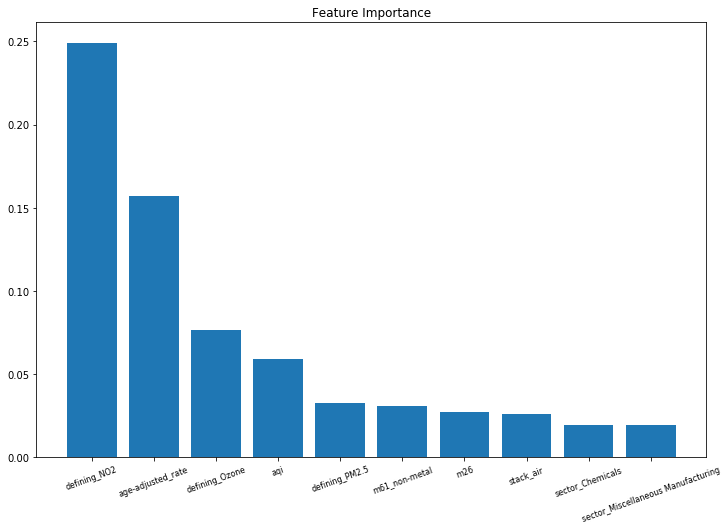

In [0]:
plt.figure(figsize=(12,8))
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]
names = names[:10]
# Barplot: Add bars
plt.bar(range(10), importances[indices[:10]])
# Add feature names as x-axis labels
plt.xticks(range(10), names, rotation=20, fontsize = 8)
# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

In [0]:
names[:10]

['defining_NO2',
 'age-adjusted_rate',
 'defining_Ozone',
 'aqi',
 'defining_PM2.5',
 'm61_non-metal',
 'm26',
 'stack_air',
 'sector_Chemicals',
 'sector_Miscellaneous Manufacturing']

In [0]:
predictions = rf_model.predict(X_test)

In [0]:
predictions

array([[  41.7,  411. ,   24.4, ...,   38.7,   73.3,   95.6],
       [ 123.1, 1419.3,   70.4, ...,  124.1,  220.6,  477.8],
       [  86.5,  936.1,   48.5, ...,   76.1,  182.8,  271.3],
       ...,
       [ 151.4, 1745.7,   97.9, ...,  198.3,  344.6,  509.8],
       [ 157.4, 1802.9,   90.8, ...,  165.5,  369.2,  479.2],
       [  76.7,  819. ,   39.5, ...,   77.9,  186.7,  222. ]])

In [0]:
error =  abs(predictions - y_test)

In [0]:
error

,cancer_Brain and Other Nervous System,cancer_Breast,cancer_Cervix Uteri,cancer_Colon and Rectum,cancer_Corpus Uteri,cancer_Esophagus,cancer_Gallbladder,cancer_Kidney and Renal Pelvis,cancer_Larynx,cancer_Leukemias,...,cancer_Melanoma of the Skin,cancer_Myeloma,cancer_Non-Hodgkin Lymphoma,cancer_Oral Cavity and Pharynx,cancer_Ovary,cancer_Pancreas,cancer_Prostate,cancer_Stomach,cancer_Thyroid,"cancer_Urinary Bladder, invasive and in situ"
519,4.7,75.0,1.6,15.4,16.8,10.3,0.0,11.0,11.7,2.4,...,0.6,4.6,11.3,25.8,0.0,32.0,92.6,0.7,13.7,2.6
284,26.1,220.3,15.4,205.4,66.1,18.0,7.3,54.2,26.4,76.9,...,142.2,10.3,118.3,79.9,9.1,23.9,207.7,25.1,43.6,103.8
511,44.5,294.9,49.5,133.2,42.5,30.0,14.4,94.0,20.4,3.2,...,137.1,6.9,32.8,73.0,26.9,55.6,176.7,17.9,5.2,98.7
331,25.1,108.8,10.7,94.8,36.7,6.1,0.0,82.0,3.3,42.0,...,63.9,31.4,35.6,26.5,5.8,5.1,113.1,30.6,38.4,25.4
210,3.1,55.0,8.1,60.3,33.0,10.9,3.9,12.9,13.9,11.2,...,44.4,24.4,1.7,11.7,16.6,25.4,123.2,24.6,12.3,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,4.2,10.0,3.1,48.5,6.8,1.4,1.6,11.7,3.6,12.9,...,44.4,15.0,15.8,0.1,6.9,16.6,11.1,7.6,21.9,29.0
124,35.8,376.0,32.6,134.0,71.2,24.5,21.1,64.6,14.7,32.9,...,130.3,56.7,103.7,35.8,49.3,78.4,375.0,53.6,93.7,16.6
567,83.4,945.7,59.9,618.5,188.5,48.0,24.6,212.3,33.0,200.1,...,291.8,78.5,290.9,156.8,113.9,168.3,775.5,103.3,178.6,242.8
450,44.4,478.9,24.8,252.1,119.9,35.3,29.3,64.5,19.8,109.2,...,23.5,41.1,135.3,70.1,49.2,78.1,381.6,56.5,107.2,125.2


In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
# print(classification_report(y_test,predictions))

In [0]:
#MultiOutput Regression

In [0]:
from sklearn.multioutput import MultiOutputRegressor 
max_depth = 30
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,
                                                          max_depth=max_depth,
                                                          random_state=0))
regr_multirf.fit(X_train, y_train) 

ValueError: y must have at least two dimensions for multi-output regression but has only one.

In [0]:
regr_multirf.score(X_test, y_test)

In [0]:
# #import warnings
# #warnings.filterwarnings('ignore') 

# estimators = np.arange(10, 200, 10)
# scores = []
# for n in estimators:
#     model.set_params(n_estimators=n)
#     model.fit(X_train, y_train)
#     scores.append(rf_model.score(X_test, y_test))
# plt.title("Effect of n_estimators")
# plt.xlabel("n_estimator")
# plt.ylabel("score")
# plt.plot(estimators, scores) 

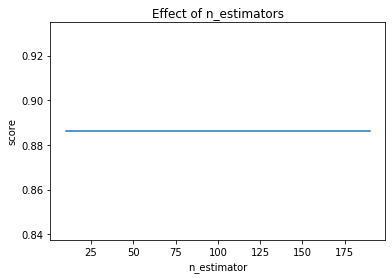

In [0]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(regr_multirf.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores) 

In [0]:
#rf_model.predict(X_test)
X_test.shape

(194, 97)

In [0]:
regr_multirf.predict(X_test)

array([[  75.2 ,  693.31,   40.16, ...,   69.57,  126.51,  296.46],
       [ 109.17, 1277.88,   46.84, ...,  111.1 ,  177.77,  395.36],
       [  90.07, 1018.42,   49.15, ...,   88.87,  185.  ,  334.8 ],
       ...,
       [ 144.17, 2263.5 ,   63.45, ...,  179.92,  320.99,  446.42],
       [ 132.88, 1406.41,   79.24, ...,  143.04,  336.54,  417.38],
       [  69.61,  884.51,   47.01, ...,   95.43,  189.84,  287.94]])

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
# X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
# y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
# y[::5, :] += (0.5 - rng.rand(20, 2))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
#X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Plot the results
# plt.figure()
# s = 25
# plt.scatter(y[:, 0], y[:, 1], c="navy", s=s,
#             edgecolor="black", label="data")
# plt.scatter(y_1[:, 0], y_1[:, 1], c="cornflowerblue", s=s,
#             edgecolor="black", label="max_depth=2")
# plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s,
#             edgecolor="black", label="max_depth=5")
# plt.scatter(y_3[:, 0], y_3[:, 1], c="orange", s=s,
#             edgecolor="black", label="max_depth=8")
# plt.xlim([-6, 6])
# plt.ylim([-6, 6])
# plt.xlabel("target 1")
# plt.ylabel("target 2")
# plt.title("Multi-output Decision Tree Regression")
# plt.legend(loc="best")
# plt.show()

In [0]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X)
features 

['aqi',
 'defining_CO',
 'defining_NO2',
 'defining_Ozone',
 'defining_PM10',
 'defining_PM2.5',
 'defining_SO2',
 'fugitive_air',
 'stack_air',
 'water',
 'underground',
 'underground_cl_i',
 'underground_c_ii-v',
 'landfills',
 'rcra_c_landfill',
 'other_landfills',
 'land_treatment',
 'surface_impndmnt',
 'rcra_surface_im',
 'other_surface_i',
 'on-site_release_total',
 'trns_rlse',
 'trns_trt',
 'total_transfers',
 'm10',
 'm41',
 'm62',
 'm40_metal',
 'm61_metal',
 'm71',
 'm81',
 'm82',
 'm72',
 'm63',
 'm66',
 'm67',
 'm64',
 'm65',
 'm73',
 'm79',
 'm90',
 'm94',
 'm99',
 'off-site_release_total',
 'm20',
 'm24',
 'm26',
 'm28',
 'm93',
 'off-site_recycled_total',
 'm56',
 'm92',
 'm40_non-metal',
 'm50',
 'm54',
 'm61_non-metal',
 'm69',
 'm95',
 'off-site_treated_total',
 'total_transfer',
 'total_releases',
 'releases',
 'on-site_contained',
 'off-site_contain',
 'production_waste',
 'sector_Apparel',
 'sector_Beverages',
 'sector_Chemical Wholesalers',
 'sector_Chemicals',


In [108]:
dot_data = StringIO()  
export_graphviz(regr_2, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

NameError: ignored

In [0]:
regr_1.score(X_test, y_test)

0.32318659347344003

In [0]:
regr_2.score(X_test, y_test)

0.7578209219400139

In [0]:
regr_3.score(X_test, y_test)

0.9779056275940134

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(600, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y += (0.5 - rng.rand(*y.shape))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=400, test_size=200, random_state=4)

max_depth = 30
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,
                                                          max_depth=max_depth,
                                                          random_state=0))
regr_multirf.fit(X_train, y_train)

regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth,
                                random_state=2)
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rf = regr_rf.predict(X_test)

# Plot the results
# plt.figure()
# s = 50
# a = 0.4
# plt.scatter(y_test[:, 0], y_test[:, 1], edgecolor='k',
#             c="navy", s=s, marker="s", alpha=a, label="Data")
# plt.scatter(y_multirf[:, 0], y_multirf[:, 1], edgecolor='k',
#             c="cornflowerblue", s=s, alpha=a,
#             label="Multi RF score=%.2f" % regr_multirf.score(X_test, y_test))
# plt.scatter(y_rf[:, 0], y_rf[:, 1], edgecolor='k',
#             c="c", s=s, marker="^", alpha=a,
#             label="RF score=%.2f" % regr_rf.score(X_test, y_test))
# plt.xlim([-6, 6])
# plt.ylim([-6, 6])
# plt.xlabel("target 1")
# plt.ylabel("target 2")
# plt.title("Comparing random forests and the multi-output meta estimator")
# plt.legend()
# plt.show()

In [0]:
y_test[:, 0]

array([-0.07856445, -1.32071125,  1.50229249,  3.2516022 , -0.74913146,
        2.61678635, -1.52297472,  1.75325861, -3.62710831,  2.56762796,
        3.19507202, -1.50708111,  1.43127542,  0.06481955, -2.57003041,
       -2.7351137 ,  2.28167653,  0.57897219,  2.74820081, -1.64386114,
        2.91610515, -0.0907859 ,  0.9299669 , -0.25944976, -2.82559305,
        2.42852386, -1.76682513,  2.82266256,  1.45476814,  0.95022459,
       -2.31072137,  0.41408948, -1.31276281, -0.2486244 , -2.87144203,
       -1.478303  ,  1.66742783, -2.70470395,  1.4108183 , -2.64667669,
       -0.25021516, -3.19780893,  1.93823996,  0.20891809, -2.98058485,
       -1.66447665,  2.9377594 ,  3.47582123, -1.28274187,  1.47704767,
       -2.27756797,  2.53554746, -2.47690245,  1.95180437,  3.40840874,
        2.48359397,  0.6520258 ,  1.54312162, -0.32209376,  2.71492852,
        2.61426351,  3.27092748,  1.01937396, -3.53731535,  1.73594311,
        2.72227956, -1.60857548,  0.72578505, -3.18641381,  1.59

#**ANN**

In [0]:
len(df)

586

In [9]:
# labels = df[['cancer_Lung and Bronchus']].values.astype(float)
# labels

labels = df[['cancer_Brain and Other Nervous System', 'cancer_Breast', 'cancer_Cervix Uteri', 'cancer_Colon and Rectum',
'cancer_Corpus Uteri', 'cancer_Esophagus', 'cancer_Gallbladder', 'cancer_Kidney and Renal Pelvis', 'cancer_Larynx', 
'cancer_Leukemias', 'cancer_Liver', 'cancer_Lung and Bronchus', 'cancer_Melanoma of the Skin', 'cancer_Myeloma', 
'cancer_Non-Hodgkin Lymphoma', 'cancer_Oral Cavity and Pharynx', 'cancer_Ovary', 'cancer_Pancreas', 'cancer_Prostate', 
             'cancer_Stomach', 'cancer_Thyroid', 'cancer_Urinary Bladder, invasive and in situ']].values.astype(float)
labels

array([[  36.,  776.,   27., ...,  115.,  157.,  158.],
       [  49.,  289.,   31., ...,   44.,   73.,   63.],
       [ 544., 5438.,  346., ...,  598.,  970., 1947.],
       ...,
       [ 178., 1826.,   64., ...,  141.,  391.,  494.],
       [ 274., 3092.,  127., ...,  253.,  582.,  857.],
       [  38.,  461.,   17., ...,   36.,   70.,  140.]])

In [10]:
np.shape(labels)

(586, 22)

In [11]:
#train = df[['life_expectancy_avg','age-adjusted_rate','aqi', 'defining_NO2', 'sector_Petroleum Bulk Terminals','defining_PM2.5','defining_Ozone']].values.astype(float)
# train
train=df[[c for c in df.columns if 'cancer' not in c][3:]]
train=train.drop(['population','life_expectancy_max','life_expectancy_min'], axis=1)
# train = df_ema[['ema1_aqi', 'ema2_aqi', 'ema3_aqi', 'ema1_defining_Ozone', 'ema2_defining_Ozone', 'ema3_defining_Ozone', 'ema1_defining_NO2', 'ema2_defining_NO2', 'ema3_defining_NO2', 'ema1_sector_Petroleum Bulk Terminals', 'ema2_sector_Petroleum Bulk Terminals', 'ema3_sector_Petroleum Bulk Terminals', 'ema1_defining_PM2.5', 'ema2_defining_PM2.5', 'ema3_defining_PM2.5']].values.astype(float)
train

,aqi,defining_CO,defining_NO2,defining_Ozone,defining_PM10,defining_PM2.5,defining_SO2,fugitive_air,stack_air,water,underground,underground_cl_i,underground_c_ii-v,landfills,rcra_c_landfill,other_landfills,land_treatment,surface_impndmnt,rcra_surface_im,other_surface_i,on-site_release_total,trns_rlse,trns_trt,total_transfers,m10,m41,m62,m40_metal,m61_metal,m71,m81,m82,m72,m63,m66,m67,m64,m65,m73,m79,...,m95,off-site_treated_total,total_transfer,total_releases,releases,on-site_contained,off-site_contain,production_waste,sector_Apparel,sector_Beverages,sector_Chemical Wholesalers,sector_Chemicals,sector_Coal Mining,sector_Computers and Electronic Products,sector_Electric Utilities,sector_Electrical Equipment,sector_Fabricated Metals,sector_Food,sector_Furniture,sector_Hazardous Waste,sector_Leather,sector_Machinery,sector_Metal Mining,sector_Miscellaneous Manufacturing,sector_Nonmetallic Mineral Product,sector_Other,sector_Paper,sector_Petroleum,sector_Petroleum Bulk Terminals,sector_Plastics and Rubber,sector_Primary Metals,sector_Printing,sector_Publishing,sector_Textile Product,sector_Textiles,sector_Tobacco,sector_Transportation Equipment,sector_Wood Products,age-adjusted_rate,life_expectancy_avg
0,39.715068,0.000000,0.00274,0.230137,0.024658,0.742466,0.000000,2583.912486,11144.868598,607.246914,0.0,0.0,32.081605,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000e+00,1.489115e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,1599.193696,0.000000,0.000000,0.000000,...,0.000000,65.172099,2345.531474,1.649358e+04,0.0,0.000000,1599.193696,2.124732e+04,0.0,0.000000,0.000000,0.012346,0.0,0.000000,0.259259,0.000000,0.024691,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.049383,0.000000,0.518519,0.098765,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.037037,475.2,81.294118
1,44.077348,0.000000,0.00000,0.406077,0.002762,0.591160,0.000000,12.777778,33.888889,0.222222,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000e+00,4.700000e+01,13.155556,4477.777778,4490.933333,0.000000,0.000000,10.444444,0.0,0.0,0.0,0.000000,0.044444,0.0,0.0,0.0,0.000000,322.888889,0.000000,0.000000,0.000000,...,0.000000,4477.777778,6418.155556,4.102000e+02,0.0,0.000000,322.888889,1.103320e+04,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.333333,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.555556,0.000000,356.8,159.097706
2,42.367123,0.000000,0.00000,0.695890,0.010959,0.293151,0.000000,4261.886785,7424.436673,342.468746,0.0,0.0,7.987461,0.0,0.0,1530.721003,20.721003,0.0,0.0,9.377287e+00,1.359769e+04,4.269205,30.570533,34.839738,56.228840,121.282759,0.156740,0.0,0.0,0.0,84.639498,0.000000,0.0,0.0,0.0,0.000000,507.813066,11.128840,0.010031,72.756113,...,0.000000,100.526646,5117.687918,1.462281e+04,0.0,1530.721003,605.397240,8.501236e+04,0.0,0.000000,0.037618,0.169279,0.0,0.047022,0.119122,0.015674,0.072100,0.018809,0.003135,0.000000,0.0000,0.018809,0.000000,0.009404,0.040752,0.034483,0.003135,0.025078,0.219436,0.056426,0.021944,0.009404,0.0,0.0,0.0,0.0,0.075235,0.003135,1432.0,395.213735
3,183.767123,0.000000,0.00000,3.038356,0.002740,0.821918,0.136986,1520.374093,63373.455743,72.904000,0.0,0.0,0.000000,0.0,0.0,10709.896000,0.000000,0.0,0.0,2.155041e+01,7.613415e+04,0.192080,904.246400,904.438480,7.344000,16.939280,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,2443.174080,720.720000,0.000000,0.000000,...,0.000000,1063.262400,31105.203520,7.933727e+04,0.0,10709.896000,3163.785600,2.048086e+05,0.0,0.016000,0.096000,0.160000,0.0,0.040000,0.312000,0.024000,0.040000,0.024000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.088000,0.000000,0.000000,0.016000,0.000000,0.032000,0.056000,0.000000,0.0,0.0,0.0,0.0,0.040000,0.056000,573.4,310.118286
4,208.062127,0.000000,0.00000,3.714128,0.000000,1.285872,0.000000,603.206865,11097.980683,5.09721

In [12]:
type(train)

pandas.core.frame.DataFrame

In [13]:
np.shape(train)

(586, 97)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(labels))
labels2 = scaler.transform(labels)
print(labels2)

StandardScaler(copy=True, with_mean=True, with_std=True)
[[-0.60173508 -0.40733676 -0.48631779 ... -0.21105916 -0.35794843
  -0.50285978]
 [-0.53733291 -0.61698082 -0.45592941 ... -0.45791982 -0.50300078
  -0.64310217]
 [ 1.91490366  1.59956381  1.93715549 ...  1.4682887   1.04595107
   2.13812585]
 ...
 [ 0.10173481  0.04466787 -0.20522528 ... -0.12065948  0.04612596
  -0.00684459]
 [ 0.57732008  0.58965632  0.2733917  ...  0.26875452  0.37594737
   0.52902896]
 [-0.59182705 -0.54293815 -0.56228874 ... -0.4857351  -0.50818122
  -0.52943203]]


In [15]:
print(scaler.fit(train))
train = scaler.transform(train)
print(train)

StandardScaler(copy=True, with_mean=True, with_std=True)
[[-1.1506268  -0.1840808  -0.42186975 ...  0.15212144 -0.46977448
  -1.37730559]
 [-1.10835645 -0.1840808  -0.43242447 ... -0.51741639 -1.01537617
  -1.08868168]
 [-1.12492847 -0.1840808  -0.43242447 ... -0.46074705  3.93927699
  -0.21277437]
 ...
 [-1.23735712 -0.1840808  -0.43242447 ...  2.23351079 -0.60387084
  -0.79529874]
 [-0.5362858  -0.1840808   0.78857817 ...  0.37372903 -0.41217295
  -0.79588235]
 [-0.71026195 -0.02914744 -0.43242447 ...  0.77383514 -0.8093931
  -0.80331482]]


In [0]:
labels3 = pd.DataFrame(labels2)

In [0]:
# !pip install conx

The ReLU is the most used activation function in the world right now.Since, it is used in almost all the convolutional neural networks or deep learning.


The function and its derivative both are monotonic.

In [19]:
import conx as cx

ann = cx.Network("ANN Network")
ann.add(cx.Layer("input", 97))
ann.add(cx.Layer("hidden", 32, activation="relu"))
ann.add(cx.Layer("hidden2", 28, activation="relu"))
ann.add(cx.Layer("hidden3", 25, activation="relu"))
ann.add(cx.Layer("hidden4", 20, activation="relu"))
ann.add(cx.Layer("hidden5", 12, activation="relu"))
ann.add(cx.Layer("hidden6", 6, activation="relu"))
ann.add(cx.Layer("output", 22))
ann.connect()
ann.compile(error="mse", optimizer="adam")
ann.summary()

Using TensorFlow backend.
ConX, version 3.7.10


Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 97)                0         
_________________________________________________________________
hidden (Dense)               (None, 32)                3136      
_________________________________________________________________
hidden2 (Dense)              (None, 28)                924       
_________________________________________________________________
hidden3 (Dense)              (None, 25)                725       
_________________________________________________________________
hidden4 (Dense)              (None, 20)                520       
_________________________________________________________________
hidden5 (Dense)              (None, 12)                252       
_________________________________________________________________
hidden6 (Dense)              (None, 6)                 78 


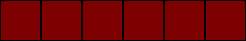

In [20]:
ann.picture()

In [106]:
x =pd.Series(ann.get_weights("hidden2"))
x

0    [[0.2742675244808197, -0.39296871423721313, 0....
1    [0.23232969641685486, 0.2525034248828888, 0.16...
dtype: object

In [52]:
ann.dashboard()

Dashboard(children=(Accordion(children=(HBox(children=(VBox(children=(Select(description='Dataset:', index=1, …

In [0]:
# ann.propagate(input= [6.9, 0.605, 0.12, 10.7, 0.703])

In [0]:
list(zip(train, labels3.values))
patterns = []

for i in range(0, len(train)):
    #inputs = list(np.vectorize(int)(train[i]))
    inputs = list(train[i])
    targets = list((labels3.values)[i])
    patterns.append((inputs, targets))
    
# patterns[0:2]

In [0]:
ann.dataset.load(patterns)

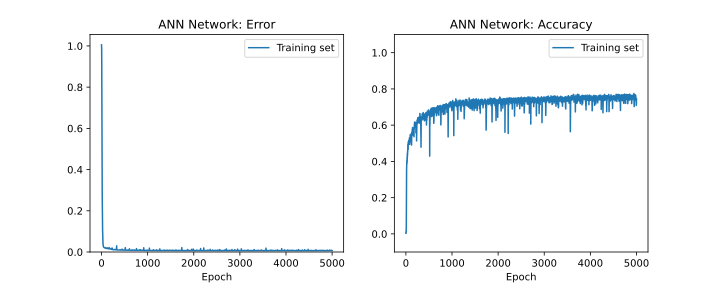

       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
# 5000 |   0.00704 |   0.74539 


In [25]:
ann.reset()
ann.train(epochs=5000, accuracy=.80, tolerance=.2, report_rate=100, plot=True)

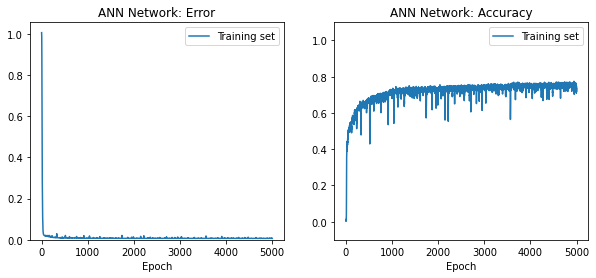

In [54]:
ann.plot_results()

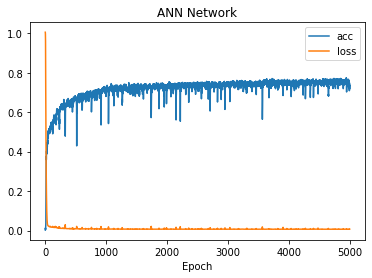

In [55]:
ann.plot(["acc", "loss"])

# **The** activations at a particular unit, given a range of input values

In [92]:
ann.evaluate(show=True)

ANN Network:
All Data Results:
----+-----------------+-----------------+------+---------+-
    |                 |          target |      |         | 
  # |           input |          output | loss |     acc | 
----+-----------------+-----------------+------+---------+-
  0 | [-1.15, -0.1... | [-0.60, -0.4... | 0.00 | correct | 
  1 | [-1.11, -0.1... | [-0.54, -0.6... | 0.00 | correct | 
  2 | [-1.12, -0.1... | [1.91, 1.60,... | 0.03 |       x | 
  3 | [0.25, -0.18... | [-0.55, -0.5... | 0.00 | correct | 
  4 | [0.48, -0.18... | [0.11, 0.06,... | 0.00 | correct | 
  5 | [-0.28, -0.1... | [0.72, 0.45,... | 0.01 |       x | 
  6 | [-0.71, -0.1... | [-0.29, -0.3... | 0.00 | correct | 
  7 | [-0.92, -0.1... | [1.02, 0.75,... | 0.02 |       x | 
  8 | [1.12, -0.18... | [-0.55, -0.5... | 0.00 | correct | 
  9 | [1.36, -0.18... | [-0.38, -0.3... | 0.00 | correct | 
 10 | [-0.13, -0.1... | [-0.28, -0.2... | 0.00 | correct | 
 11 | [-1.07, -0.1... | [-0.37, -0.4... | 0.00 | correct | 
 12 | [-0

In [0]:
# for i in range(ann["hidden"].size):
#   ann.plot_activation_map(from_layer="input", from_units= (0,1), to_layer="hidden", to_unit=i)

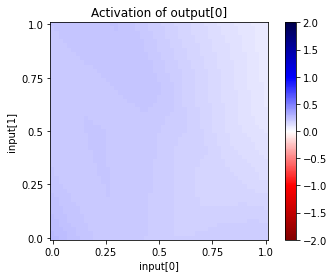

In [88]:
ann.plot_activation_map(from_layer="input", from_units=(0,1),
                        to_layer="output", to_unit=0)

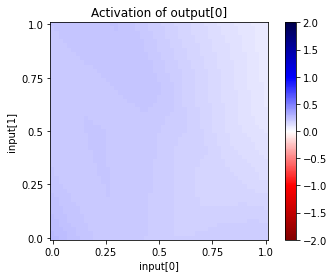

In [90]:
ann.plot_activation_map()

#KERAS

In [36]:
!pip install keras

In [0]:
from tensorflow import keras
import tensorflow as tf


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train, labels3, test_size=0.33, random_state=42)

In [30]:
X_train.shape

(392, 97)

In [32]:
X_test.shape

(194, 97)

In [33]:
y_train.shape

(392, 22)

In [34]:
y_test.shape

(194, 22)

In [40]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(97, activation=tf.nn.relu,
                       input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(28, activation=tf.nn.relu),
    keras.layers.Dense(25, activation=tf.nn.relu),
    keras.layers.Dense(20, activation=tf.nn.relu),
    keras.layers.Dense(12, activation=tf.nn.relu),
    keras.layers.Dense(6, activation=tf.nn.relu),
    keras.layers.Dense(22)
  ])

  optimizer = tf.compat.v1.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 97)                9506      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                3136      
_________________________________________________________________
dense_2 (Dense)              (None, 28)                924       
_________________________________________________________________
dense_3 (Dense)              (None, 25)                725       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_5 (Dense)              (None, 12)                252       
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 7

In [47]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 200

# Store training stats
history2 = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................

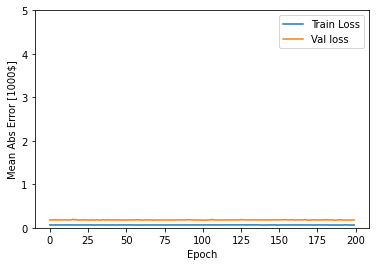

In [48]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mae']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mae']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 5])

plot_history(history2)


............................................................................

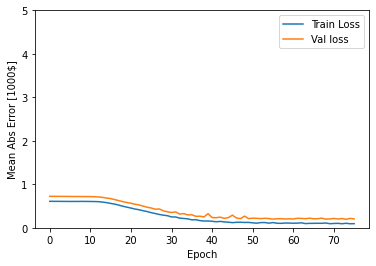

In [49]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history2 = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history2)

In [44]:
[loss, mae] = model.evaluate(X_test, y_test, verbose=0)

print("Testing set Mean Abs Error: {:7.2f}".format(mae))

Testing set Mean Abs Error:    0.21
